Taller 4 - métodos computacionales 2

Silvana Archila y Catalina Fuentes

1. Ecuación de Poisson en un disco

c:\Users\Catalina Fuentes\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


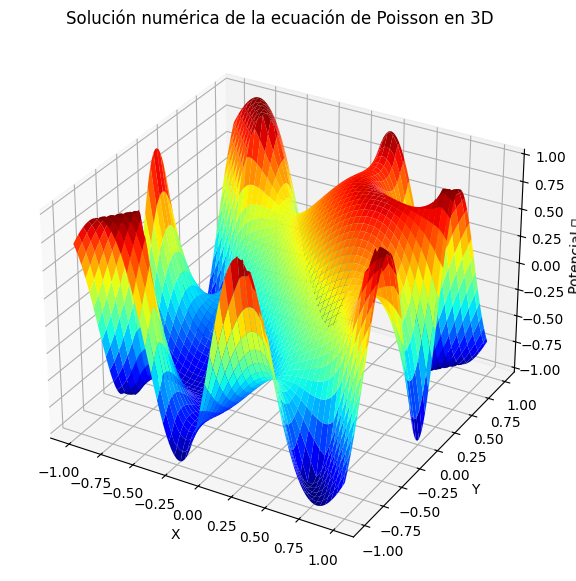

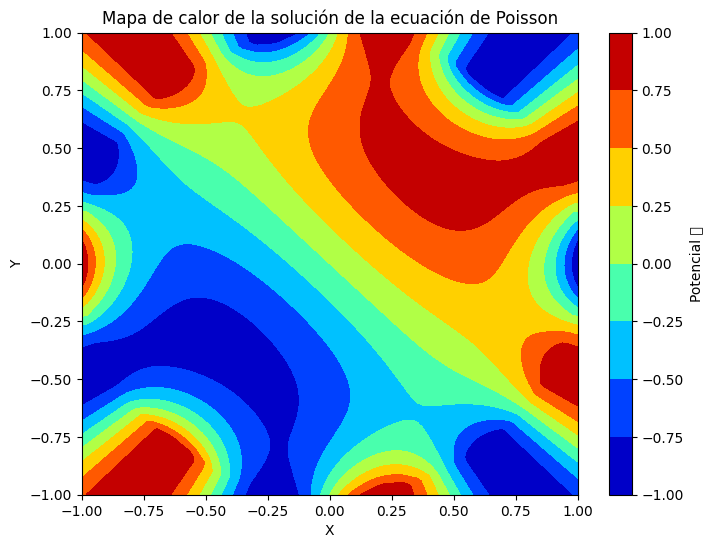

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Defino parámetros
N = 100
delta = (2/(N-1))**2 #espaciado entre puntos al cuadrado
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
convergencia = 10**(-4)
rho = np.zeros((N, N))
phi = np.zeros((N, N))
phi_new = np.zeros((N, N))

#Pongo condiciones iniciales
for i in range(N):
    for j in range(N):
        rho[i,j] = -x[i] - y[j]
        if x[i]**2 + y[j]**2 >= 1:  
            phi[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))  #condición de frontera
        else:
            phi[i, j] = np.random.random()  
            
#Resuelvo ecuación diferencial
for t in range(15000):  
    phi = phi_new.copy()
    for i in range(1, N-1):  #ojo, evitar bordes
        for j in range(1, N-1):
            if np.sqrt(x[i]**2 + y[j]**2) < 1:  #solo actualizar dentro del círculo
                phi_new[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] - 4* delta * np.pi  * rho[i,j]) / 4
#signo??

    #Aplicar condicion de frontera otra vez
    for i in range(N):
        for j in range(N):
            if x[i]**2 + y[j]**2 > 1: 
                phi_new[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))

    #Criterio de convergencia
    if np.trace(np.abs(phi - phi_new)) < convergencia:
        break

#Grafica 3D
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi_new, cmap='jet')
ax.set_title('Solución de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potencial 𝜙')
plt.show()

#Grafica 2D 
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi_new, cmap='jet')
plt.colorbar(label='Potencial 𝜙')
plt.title('Mapa de calor de la solución de la ecuación de Poisson')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

2. Ecuación de onda unidimensional

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Parámetros
longitud = 2.0         
velocidad_onda = 1.0  
num_puntos = 100       
espaciado = longitud / (num_puntos - 1)  
tiempo_paso = 0.005    
coef_courant = velocidad_onda * tiempo_paso / espaciado  

tiempo_total = 3.0
num_pasos = int(tiempo_total / tiempo_paso)

#Condición inicial
posiciones = np.linspace(0, longitud, num_puntos)
condicion_inicial = np.exp(-125 * (posiciones - 0.5)**2)  

#Para evolución temporal
def evolucion_onda(solucion_actual, solucion_anterior, frontera):
    nueva_solucion = np.copy(solucion_actual)
    for i in range(1, num_puntos - 1):
        nueva_solucion[i] = 2 * solucion_actual[i] - solucion_anterior[i] + coef_courant**2 * (
            solucion_actual[i+1] - 2 * solucion_actual[i] + solucion_actual[i-1])
    frontera(nueva_solucion)
    return nueva_solucion


MovieWriter imagemagick unavailable; using Pillow instead.


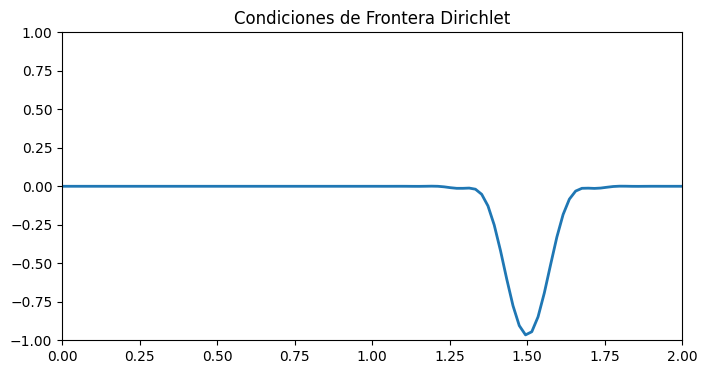

In [44]:
# Condición de frontera Dirichlet
def frontera_dirichlet(solucion):
    solucion[0] = 0
    solucion[-1] = 0

# Función de actualización para Dirichlet
def actualizar_dirichlet(frame, linea, solucion_actual, solucion_anterior):
    nueva_solucion = evolucion_onda(solucion_actual, solucion_anterior, frontera_dirichlet)
    solucion_anterior[:] = solucion_actual
    solucion_actual[:] = nueva_solucion
    linea.set_ydata(solucion_actual)
    return linea,

# Animación para Dirichlet
def animar_dirichlet():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, longitud)
    ax.set_ylim(-1, 1)
    linea, = ax.plot(posiciones, condicion_inicial, lw=2)
    ax.set_title('Condiciones de Frontera Dirichlet')

    solucion_actual = np.copy(condicion_inicial)
    solucion_anterior = np.copy(condicion_inicial)

    animacion = animation.FuncAnimation(fig, actualizar_dirichlet, frames=num_pasos,
                                        fargs=(linea, solucion_actual, solucion_anterior),
                                        interval=20, blit=True)
    animacion.save('2.1.onda1D_dirichlet.gif', writer='imagemagick')
    plt.show()
    
animar_dirichlet()

La onda se propaga desde el centro hacia los bordes, pero al llegar a los bordes se anula, es decir, la amplitud de la onda en los extremos se mantiene en cero. Las oscilaciones desaparecen al alcanzar los bordes. Esto es generado por la condición de extremos fijos.

MovieWriter imagemagick unavailable; using Pillow instead.


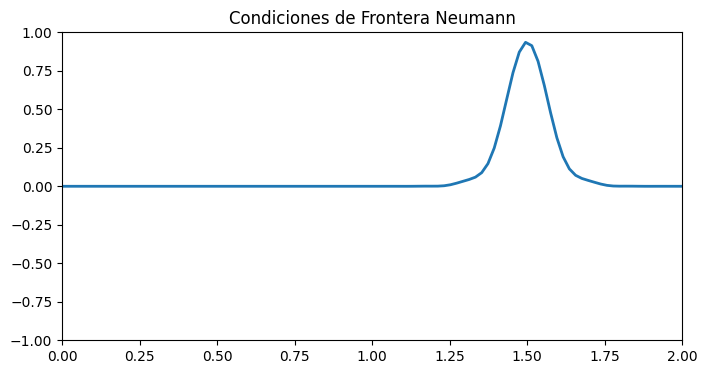

In [45]:
#Condición de frontera Neumann
def frontera_neumann(solucion):
    solucion[0] = solucion[1]
    solucion[-1] = solucion[-2]

#Función de actualización para Neumann
def actualizar_neumann(frame, linea, solucion_actual, solucion_anterior):
    nueva_solucion = evolucion_onda(solucion_actual, solucion_anterior, frontera_neumann)
    solucion_anterior[:] = solucion_actual
    solucion_actual[:] = nueva_solucion
    linea.set_ydata(solucion_actual)
    return linea,

#Animación 
def animar_neumann():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, longitud)
    ax.set_ylim(-1, 1)
    linea, = ax.plot(posiciones, condicion_inicial, lw=2)
    ax.set_title('Condiciones de Frontera Neumann')

    solucion_actual = np.copy(condicion_inicial)
    solucion_anterior = np.copy(condicion_inicial)

    animacion = animation.FuncAnimation(fig, actualizar_neumann, frames=num_pasos,
                                        fargs=(linea, solucion_actual, solucion_anterior),
                                        interval=20, blit=True)
    animacion.save('2.2.onda1D_neumann.gif', writer='imagemagick')
    plt.show()

animar_neumann()


La onda se propaga normalmente en el dominio y al llegar a los extremos parece "continuar" más allá de los límites del dominio de forma suave, pues la derivada en los bordes es 0. Es decir que los extremos de la onda no presentan cambios en su pendiente.

MovieWriter imagemagick unavailable; using Pillow instead.


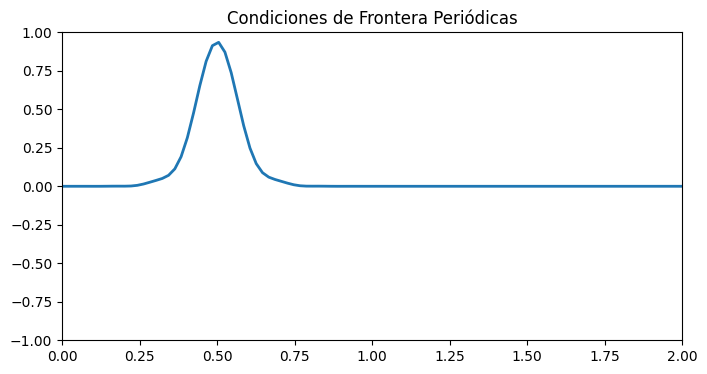

In [57]:
#Condición de frontera Periódica
def frontera_periodica(solucion):
    solucion[0] = solucion[-2]
    solucion[-1] = solucion[1]
    
    #solucion[0] = solucion[-1]
    
#Función de actualización 
def actualizar_periodica(frame, linea, solucion_actual, solucion_anterior):
    nueva_solucion = evolucion_onda(solucion_actual, solucion_anterior, frontera_periodica)
    solucion_anterior[:] = solucion_actual
    solucion_actual[:] = nueva_solucion
    linea.set_ydata(solucion_actual)
    return linea,

#Animación
def animar_periodica():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, longitud)
    ax.set_ylim(-1, 1)
    linea, = ax.plot(posiciones, condicion_inicial, lw=2)
    ax.set_title('Condiciones de Frontera Periódicas')

    solucion_actual = np.copy(condicion_inicial)
    solucion_anterior = np.copy(condicion_inicial)

    animacion = animation.FuncAnimation(fig, actualizar_periodica, frames=num_pasos,
                                        fargs=(linea, solucion_actual, solucion_anterior),
                                        interval=20, blit=True)
    animacion.save('2.3.onda1D_periodica.gif', writer='imagemagick')
    plt.show()
animar_periodica()


La onda se propaga a lo largo del dominio y al llegar a un extremo reaparece en el otro extremo, como si estuvieran conectados. Esto crea un comportamiento donde la onda parece estar en un circuito cerrado, repitiendo su ciclo a medida que viaja. Es decir, que los extremos del dominio están conectados entre sí, la onda se comporta como si estuviera en un sistema circular.

MovieWriter imagemagick unavailable; using Pillow instead.


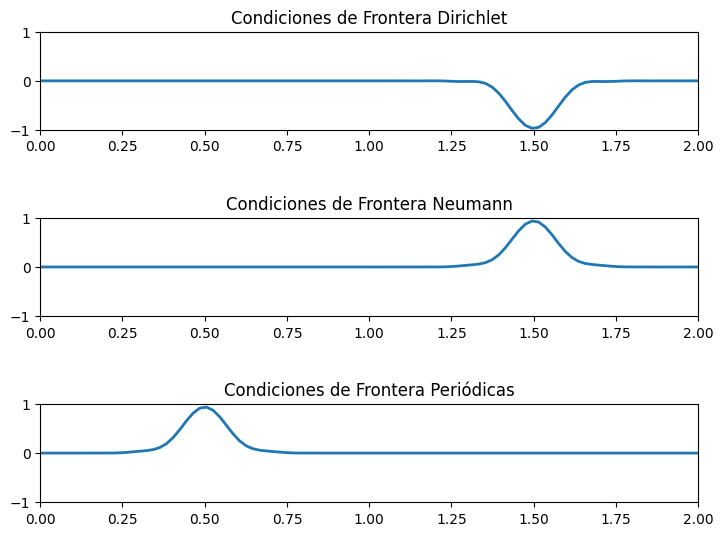

In [55]:
#SIMULACION SIMULTANEA

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Inicializar soluciones para cada tipo de condición de frontera
solucion_dirichlet_actual = np.copy(condicion_inicial)
solucion_dirichlet_anterior = np.copy(condicion_inicial)

solucion_neumann_actual = np.copy(condicion_inicial)
solucion_neumann_anterior = np.copy(condicion_inicial)

solucion_periodica_actual = np.copy(condicion_inicial)
solucion_periodica_anterior = np.copy(condicion_inicial)

# Función de actualización combinada para las tres simulaciones
def actualizar_todas(frame, linea_dirichlet, linea_neumann, linea_periodica):
    # Actualizar Dirichlet
    nueva_solucion_dirichlet = evolucion_onda(solucion_dirichlet_actual, solucion_dirichlet_anterior, frontera_dirichlet)
    solucion_dirichlet_anterior[:] = solucion_dirichlet_actual
    solucion_dirichlet_actual[:] = nueva_solucion_dirichlet
    linea_dirichlet.set_ydata(solucion_dirichlet_actual)
    
    # Actualizar Neumann
    nueva_solucion_neumann = evolucion_onda(solucion_neumann_actual, solucion_neumann_anterior, frontera_neumann)
    solucion_neumann_anterior[:] = solucion_neumann_actual
    solucion_neumann_actual[:] = nueva_solucion_neumann
    linea_neumann.set_ydata(solucion_neumann_actual)
    
    # Actualizar Periódica
    nueva_solucion_periodica = evolucion_onda(solucion_periodica_actual, solucion_periodica_anterior, frontera_periodica)
    solucion_periodica_anterior[:] = solucion_periodica_actual
    solucion_periodica_actual[:] = nueva_solucion_periodica
    linea_periodica.set_ydata(solucion_periodica_actual)
    
    return linea_dirichlet, linea_neumann, linea_periodica

# Configuración de la figura y los subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# Subplot Dirichlet
axs[0].set_xlim(0, longitud)
axs[0].set_ylim(-1, 1)
axs[0].set_title('Condiciones de Frontera Dirichlet')
linea_dirichlet, = axs[0].plot(posiciones, condicion_inicial, lw=2)

# Subplot Neumann
axs[1].set_xlim(0, longitud)
axs[1].set_ylim(-1, 1)
axs[1].set_title('Condiciones de Frontera Neumann')
linea_neumann,= axs[1].plot(posiciones, condicion_inicial, lw=2)

# Subplot Periódica
axs[2].set_xlim(0, longitud)
axs[2].set_ylim(-1, 1)
axs[2].set_title('Condiciones de Frontera Periódicas')
linea_periodica, = axs[2].plot(posiciones, condicion_inicial, lw=2)

# Animación combinada
plt.subplots_adjust(hspace=0.5)  
animacion = animation.FuncAnimation(fig, actualizar_todas, frames=num_pasos, 
                                    fargs=(linea_dirichlet, linea_neumann, linea_periodica),
                                    interval=20, blit=True)
animacion.save('2.bono.simultaneas.gif', writer='imagemagick')

# Mostrar la animación
plt.tight_layout(pad=3.0)
plt.show()


Coeficiente de Courant:  la velocidad de propagación de la onda en la simulación debe ser igual o menor a la velocidad con la que se propaga la información en el sistema físico. TOKA METERLE MAS PARLA PERO ES LA 1:17AM ME MUERO DEL SUEÑO LLEVO 4 DIAS SEGUIDOS ACOSTANDOME A LAS 2AM NO AWANTO MAS MEPER

3. aaa

C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_60716\1622367239.py:30: RuntimeWarning: overflow encountered in scalar multiply
  psi_new[i] = (psi[i] - dt * (0.5 * psi[i] * (psi[i + 1] - psi[i - 1]) / dx)
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_60716\1622367239.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  + alpha**2 * dt * (psi[i + 2] - 2 * psi[i + 1] + 2 * psi[i - 1] - psi[i - 2]) / dx**3)
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_60716\1622367239.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  psi_new[i] = (psi[i] - dt * (0.5 * psi[i] * (psi[i + 1] - psi[i - 1]) / dx)
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_60716\1622367239.py:31: RuntimeWarning: invalid value encountered in scalar add
  + alpha**2 * dt * (psi[i + 2] - 2 * psi[i + 1] + 2 * psi[i - 1] - psi[i - 2]) / dx**3)
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_60716\1622367239.py:30: RuntimeWarning: invalid value encount

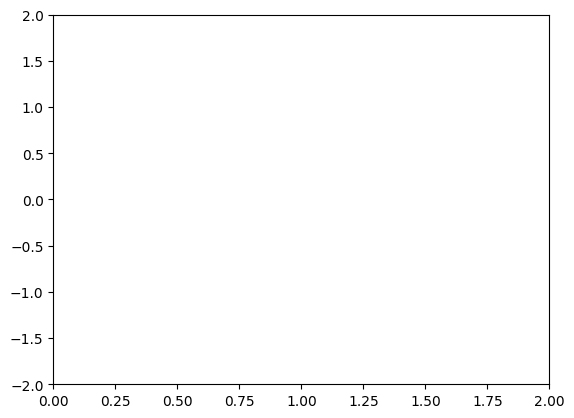

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
alpha = 0.022
L = 2.0
T = 10.0
nx = 100
nt = 1000
dx = L / (nx - 1)
dt = T / (nt - 1)

# Grilla espacial
x = np.linspace(0, L, nx)

# Condición inicial
psi = np.cos(np.pi * x)

# Función para aplicar condiciones de frontera periódicas
def apply_periodic_boundary(psi):
    psi[0] = psi[-2]
    psi[-1] = psi[1]
    return psi

# Función de actualización de psi usando diferencias finitas
def update_psi(psi, dx, dt, alpha):
    psi_new = np.copy(psi)
    for i in range(1, len(psi) - 2):
        psi_new[i] = (psi[i] - dt * (0.5 * psi[i] * (psi[i + 1] - psi[i - 1]) / dx)
                      + alpha**2 * dt * (psi[i + 2] - 2 * psi[i + 1] + 2 * psi[i - 1] - psi[i - 2]) / dx**3)
    psi_new = apply_periodic_boundary(psi_new)
    return psi_new

# Simulación
psi_all = [psi]
for t in range(nt):
    psi = update_psi(psi, dx, dt, alpha)
    psi_all.append(psi)

# Animación
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-2, 2)
line, = ax.plot(x, psi_all[0])

def animate(i):
    line.set_ydata(psi_all[i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(psi_all), interval=30, blit=True)
ani.save('3.1.simulacion.gif', writer='imagemagick')
plt.show()


4. Ecuación de onda bidimensional

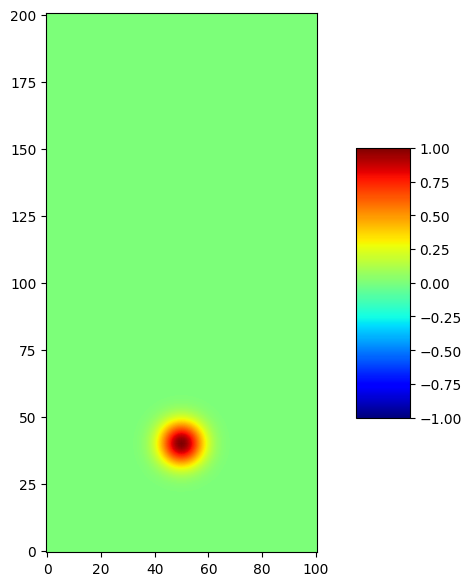

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
dx = 0.01  
dy = 0.01  
dt = 0.01 
c = 0.5  
tmax = 3.0 
xmax = 2.0  
ymax = 1.0  

#Número de celdas
nx = int(xmax/dx) + 1
ny = int(ymax/dy) + 1 
nt = int(tmax/dt) + 1

#Variables
x = np.linspace(0, xmax, nx)
y = np.linspace(0, ymax, ny)
u = np.zeros((nx, ny))  # u actual
u_new = np.zeros((nx, ny))  # u futuro
u_old = np.zeros((nx, ny))  # u pasado

# Condición inicial: gaussiana
for i in range(nx):
    for j in range(ny):
        u[i, j] = np.exp(-150 * ((x[i] - 0.4)**2 + (y[j] - 0.5)**2))

# Función para aplicar las condiciones de frontera de Dirichlet
def condiciones_frontera_dirichlet(u):
    u[0, :] = 0  # x=0
    u[-1, :] = 0  # x=xmax
    u[:, 0] = 0  # y=0
    u[:, -1] = 0  # y=ymax
    
    # Pared
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

# Función para aplicar las condiciones de frontera de Neumann
def condiciones_frontera_neumann(u):
    # Condiciones de Neumann en las partes horizontales y verticales
    u[0, :] = u[1, :]  # x=0, derivada en x = 0
    u[-1, :] = u[-2, :]  # x=xmax, derivada en x = 0
    u[:, 0] = u[:, 1]  # y=0, derivada en y = 0
    u[:, -1] = u[:, -2]  # y=ymax, derivada en y = 0
    
    # Pared
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

# Animación
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(u, interpolation='bilinear', cmap='jet', origin='lower', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, shrink=0.5, aspect=5)



In [23]:
# Actualizar cada frame para Dirichlet
def update_plot_dirichlet(frame): 
    global u, u_new, u_old
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    u_old = u.copy()
    u = u_new.copy()
    
    condiciones_frontera_dirichlet(u)

    #actualizar gráfica
    cax.set_data(u)
    return cax,

#Animación para Dirichlet
ani_dirichlet = animation.FuncAnimation(fig, update_plot_dirichlet, frames=nt, interval=50, blit=True)
ani_dirichlet.save('4.1.simulacion_dirichlet.gif', writer='imagemagick')
plt.show()



MovieWriter imagemagick unavailable; using Pillow instead.


In [26]:
# Actualizar cada frame para Neumann
def update_plot_neumann(frame): 
    global u, u_new, u_old
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    u_old = u.copy()
    u = u_new.copy()
    
    condiciones_frontera_neumann(u)

    # actualizar gráfica
    cax.set_data(u)
    return cax,

# Animación para Neumann
ani_neumann = animation.FuncAnimation(fig, update_plot_neumann, frames=nt, interval=50, blit=True)
ani_neumann.save('4.2.simulacion_neumann.gif', writer='imagemagick')
plt.show()

#NO SE SI ESTO ESTA BIEN

MovieWriter imagemagick unavailable; using Pillow instead.
